In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Leitura dos dados

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Tamanho do dataframe

In [3]:
df.shape

(200, 5)

Verificador dados nulos

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Informações estatísticas

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Gerando gráfico da renda anual em função do score do cliente

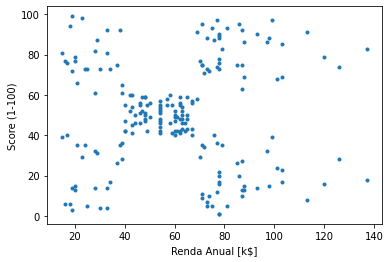

In [7]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='.')
plt.xlabel('Renda Anual [k$]')
plt.ylabel('Score (1-100)')
plt.show()

Selecionando dados para o agrupamento

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Importando K-means

In [9]:
from sklearn.cluster import KMeans

Clusterizando com k = 5

In [11]:
modelo_kmeans = KMeans(n_clusters= 5, init='k-means++')
y_kmeans= modelo_kmeans.fit_predict(X)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


Visualizando o primeiro grupo criado

In [12]:
print(X[y_kmeans == 0])

     Annual Income (k$)  Spending Score (1-100)
123                  69                      91
125                  70                      77
127                  71                      95
129                  71                      75
131                  71                      75
133                  72                      71
135                  73                      88
137                  73                      73
139                  74                      72
141                  75                      93
143                  76                      87
145                  77                      97
147                  77                      74
149                  78                      90
151                  78                      88
153                  78                      76
155                  78                      89
157                  78                      78
159                  78                      73
161                  79                 

Visualizando todos os grupos

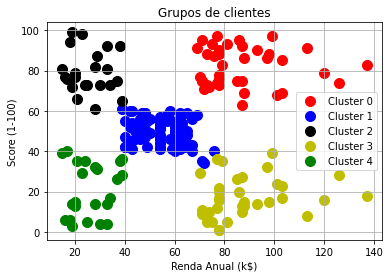

In [13]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()